# **Load Librarry**

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, KFold, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# **Load Dataset**

In [136]:
file_path_main = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Finpro/data_FP/data_FE/CFeaturesEngineering_Nm.csv'

In [137]:
# Muat dataset Anda
df_main = pd.read_csv(file_path_main)

# **Fitur Selection**

## **Features Selecting Absolute Correlation and Heatmap**

In [7]:
# Ambil semua nama kolom
all_columns = df_main.columns.tolist()

# Hapus 'nama_industri_encoded' dari daftar nama kolom
selected_columns = [col for col in all_columns if col != 'nama_industri_encoded']


In [8]:
def calculate_abs_corr(df, features, target):
    abs_corr_dict = {}
    for feature in features:
        abs_corr_dict[feature] = abs(df[feature].corr(df[target]))
    return abs_corr_dict
abs_corr_scores = calculate_abs_corr(df_main, selected_columns, 'nama_industri_encoded')

# Mengurutkan nilai absolut koefisien korelasi dari yang terbesar ke yang terkecil
sorted_abs_corr_scores = sorted(abs_corr_scores.items(), key=lambda x: x[1], reverse=True)

# Menampilkan hasil
for feature, abs_corr_score in sorted_abs_corr_scores:
    print(f"Nilai Absolut Korelasi untuk fitur '{feature}': {abs_corr_score}")

Nilai Absolut Korelasi untuk fitur 'tipe_kompensasi_rp': nan
Nilai Absolut Korelasi untuk fitur 'mata_uang_rp': nan
Nilai Absolut Korelasi untuk fitur 'standar_gaji': 0.2331191893079255
Nilai Absolut Korelasi untuk fitur 'rasio_lamaran_industri': 0.17828260633804496
Nilai Absolut Korelasi untuk fitur 'gaji_rata-rata_perbulan': 0.1705317722762122
Nilai Absolut Korelasi untuk fitur 'tingkat_pengalaman_terformat_encoded': 0.1590581608031775
Nilai Absolut Korelasi untuk fitur 'karyawan_industri': 0.14977236160699886
Nilai Absolut Korelasi untuk fitur 'periode_pembayaran_encoded': 0.14901892616963835
Nilai Absolut Korelasi untuk fitur 'tipe_pendaftaran_encoded': 0.10497585078193558
Nilai Absolut Korelasi untuk fitur 'skill_3_encoded': 0.09606315578610812
Nilai Absolut Korelasi untuk fitur 'jumlah_skill': 0.08166256301071248
Nilai Absolut Korelasi untuk fitur 'pelamar_industri': 0.06635102738862224
Nilai Absolut Korelasi untuk fitur 'jumlah_karyawan': 0.06301305727417206
Nilai Absolut Korela

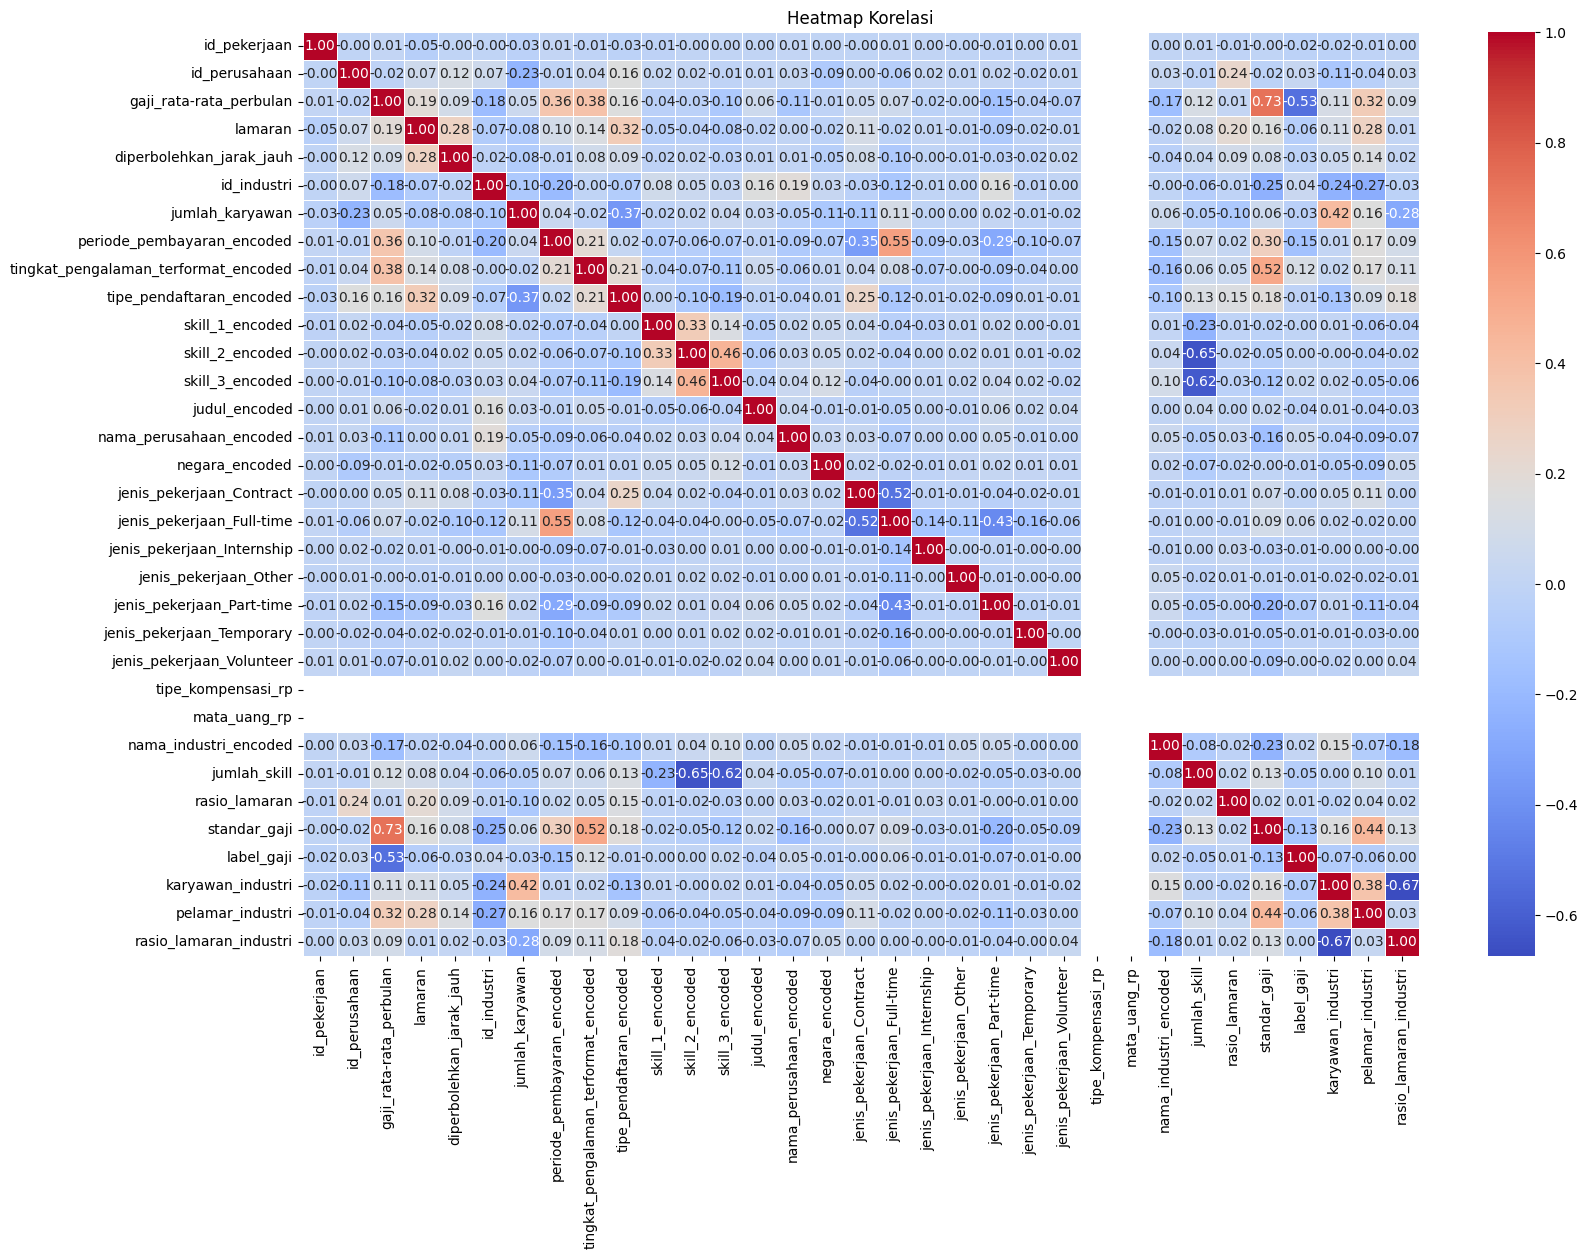

In [9]:
plt.figure(figsize=(18, 12))
sns.heatmap(df_main.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

## **Features Selecting Base Model**

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = df_main[selected_columns]
y = df_main['nama_industri_encoded']

# Bagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bangun model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Lihat feature importances dari Random Forest
print("Feature Importances dari Random Forest:")
for i, feature in enumerate(X.columns):
    print(f"Feature '{feature}': {rf.feature_importances_[i]}")

# Bangun model Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Lihat feature importances dari Decision Tree
print("\nFeature Importances dari Decision Tree:")
for i, feature in enumerate(X.columns):
    print(f"Feature '{feature}': {dt.feature_importances_[i]}")

Feature Importances dari Random Forest:
Feature 'id_pekerjaan': 0.012573831733752799
Feature 'id_perusahaan': 0.023932738633902547
Feature 'gaji_rata-rata_perbulan': 0.050246885318243714
Feature 'lamaran': 0.005592345352212342
Feature 'diperbolehkan_jarak_jauh': 0.002991140142319891
Feature 'id_industri': 0.16367823980562893
Feature 'jumlah_karyawan': 0.01631183122110262
Feature 'periode_pembayaran_encoded': 0.006003778571842058
Feature 'tingkat_pengalaman_terformat_encoded': 0.01334264095112816
Feature 'tipe_pendaftaran_encoded': 0.00450678896880289
Feature 'skill_1_encoded': 0.014800430970577271
Feature 'skill_2_encoded': 0.011449998367359967
Feature 'skill_3_encoded': 0.006286341695811398
Feature 'judul_encoded': 0.011625124281030425
Feature 'nama_perusahaan_encoded': 0.018775503336421476
Feature 'negara_encoded': 0.004636900999426942
Feature 'jenis_pekerjaan_Contract': 0.0014439482612227104
Feature 'jenis_pekerjaan_Full-time': 0.0032931151458109793
Feature 'jenis_pekerjaan_Internsh

## **Features Selecting Information Value**

In [513]:
def calculate_iv(df, features, target):
    iv_dict = {}

    for feature in features:
        lst = []
        for val in df[feature].unique():
            good = df[(df[feature] == val) & (df[target] == 1)].count()[target]
            bad = df[(df[feature] == val) & (df[target] == 0)].count()[target]

            if good == 0 or bad == 0:
                iv = 0  # Hindari pembagian oleh nol
            else:
                iv = (good / df[target].sum() - bad / (len(df[target]) - df[target].sum())) * np.log(good / df[target].sum() / (bad / (len(df[target]) - df[target].sum())))

            lst.append({
                'Value': val,
                'All': df[df[feature] == val].count()[target],
                'Good': good,
                'Bad': bad,
                'Distribusi Good': good / df[target].sum(),
                'Distribusi Bad': bad / (len(df[target]) - df[target].sum()),
                'IV': iv
            })

        data = pd.DataFrame(lst)
        iv_dict[feature] = data['IV'].sum()

    return iv_dict

# Hitung IV untuk fitur-fitur terpilih
iv_scores = calculate_iv(df_main, selected_columns, 'nama_industri_encoded')

# Tampilkan hasil
for feature, iv_score in iv_scores.items():
    print(f"Informasi Value (IV) untuk fitur '{feature}': {iv_score}")

NameError: name 'selected_columns' is not defined

## **Select Unseful Features**

In [92]:
unuseFeatures=['id_industri', 'id_pekerjaan','id_perusahaan','judul_encoded','negara_encoded','nama_perusahaan_encoded','tipe_kompensasi_rp','mata_uang_rp','standar_gaji','jumlah_karyawan']

# **Preparation to Multilabel Classification**

## **One Hot Encoding**

In [84]:
# Lakukan one-hot encoding pada kolom 'nama_industri_encoded'
encoded = pd.get_dummies(df_main['nama_industri_encoded'], prefix='nama_industri_encoded')

# Gabungkan hasil encoding dengan DataFrame awal
df_combined = pd.concat([df_main, encoded], axis=1)

# Gabungkan baris-baris dengan 'id_pekerjaan' yang sama menggunakan metode max
df_groupby = df_combined.groupby('id_pekerjaan', as_index=False).max()

In [85]:
df_groupby

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,nama_industri_encoded_66,nama_industri_encoded_67,nama_industri_encoded_68,nama_industri_encoded_69,nama_industri_encoded_70,nama_industri_encoded_71,nama_industri_encoded_72,nama_industri_encoded_73,nama_industri_encoded_74,nama_industri_encoded_75
0,102339515,52132271,5479.166667,0,0,91,7,5,4,2,...,False,False,False,False,False,False,False,False,False,False
1,108965123,0,4583.333333,2,0,19,0,5,4,3,...,False,False,False,False,False,False,False,False,False,False
2,120418612,52109750,5501.933245,0,1,91,7,5,4,2,...,False,False,False,False,False,False,False,False,False,False
3,133114754,77766802,5632.000000,0,0,92,15,5,2,3,...,False,False,False,False,True,False,False,False,False,False
4,218881389,0,8733.333333,1,0,52,0,5,4,3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32913,3757937095,437225,14791.666667,0,1,25,1260,5,4,1,...,True,False,False,False,False,False,False,False,False,False
32914,3757938018,18213359,3919.520000,0,0,100,36,2,2,1,...,False,False,False,False,False,False,False,False,False,False
32915,3757938019,474443,6776.000000,0,0,147,314,5,4,1,...,False,False,False,False,False,False,False,False,False,False
32916,3757940025,2192142,7085.416667,0,0,135,300,5,4,1,...,False,False,False,False,False,False,False,False,False,False


In [86]:
# # Gabungkan dengan DataFrame awal menggunakan left join
# df_result = df_main.merge(df_groupby, how='left', on='id_pekerjaan')

## **Drop Unuseful Features**

In [87]:
df_fix=df_groupby.drop(columns=['nama_industri_encoded'])

In [88]:
df_fix

,id_pekerjaan,id_perusahaan,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,id_industri,jumlah_karyawan,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,...,nama_industri_encoded_66,nama_industri_encoded_67,nama_industri_encoded_68,nama_industri_encoded_69,nama_industri_encoded_70,nama_industri_encoded_71,nama_industri_encoded_72,nama_industri_encoded_73,nama_industri_encoded_74,nama_industri_encoded_75
0,102339515,52132271,5479.166667,0,0,91,7,5,4,2,...,False,False,False,False,False,False,False,False,False,False
1,108965123,0,4583.333333,2,0,19,0,5,4,3,...,False,False,False,False,False,False,False,False,False,False
2,120418612,52109750,5501.933245,0,1,91,7,5,4,2,...,False,False,False,False,False,False,False,False,False,False
3,133114754,77766802,5632.000000,0,0,92,15,5,2,3,...,False,False,False,False,True,False,False,False,False,False
4,218881389,0,8733.333333,1,0,52,0,5,4,3,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32913,3757937095,437225,14791.666667,0,1,25,1260,5,4,1,...,True,False,False,False,False,False,False,False,False,False
32914,3757938018,18213359,3919.520000,0,0,100,36,2,2,1,...,False,False,False,False,False,False,False,False,False,False
32915,3757938019,474443,6776.000000,0,0,147,314,5,4,1,...,False,False,False,False,False,False,False,False,False,False
32916,3757940025,2192142,7085.416667,0,0,135,300,5,4,1,...,False,False,False,False,False,False,False,False,False,False


In [89]:
df_modeling=df_fix.drop(columns=unuseFeatures)

In [90]:
df_modeling

,gaji_rata-rata_perbulan,lamaran,diperbolehkan_jarak_jauh,periode_pembayaran_encoded,tingkat_pengalaman_terformat_encoded,tipe_pendaftaran_encoded,skill_1_encoded,skill_2_encoded,skill_3_encoded,jenis_pekerjaan_Contract,...,nama_industri_encoded_66,nama_industri_encoded_67,nama_industri_encoded_68,nama_industri_encoded_69,nama_industri_encoded_70,nama_industri_encoded_71,nama_industri_encoded_72,nama_industri_encoded_73,nama_industri_encoded_74,nama_industri_encoded_75
0,5479.166667,0,0,5,4,2,22,21,36,0,...,False,False,False,False,False,False,False,False,False,False
1,4583.333333,2,0,5,4,3,35,36,36,0,...,False,False,False,False,False,False,False,False,False,False
2,5501.933245,0,1,5,4,2,22,21,35,0,...,False,False,False,False,False,False,False,False,False,False
3,5632.000000,0,0,5,2,3,21,22,36,0,...,False,False,False,False,True,False,False,False,False,False
4,8733.333333,1,0,5,4,3,30,20,36,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32913,14791.666667,0,1,5,4,1,34,36,36,0,...,True,False,False,False,False,False,False,False,False,False
32914,3919.520000,0,0,2,2,1,23,24,36,0,...,False,False,False,False,False,False,False,False,False,False
32915,6776.000000,0,0,5,4,1,27,36,36,0,...,False,False,False,False,False,False,False,False,False,False
32916,7085.416667,0,0,5,4,1,23,24,36,0,...,False,False,False,False,False,False,False,False,False,False


In [134]:
df_modeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32918 entries, 0 to 32917
Data columns (total 95 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   gaji_rata-rata_perbulan               32918 non-null  float64
 1   lamaran                               32918 non-null  int64  
 2   diperbolehkan_jarak_jauh              32918 non-null  int64  
 3   periode_pembayaran_encoded            32918 non-null  int64  
 4   tingkat_pengalaman_terformat_encoded  32918 non-null  int64  
 5   tipe_pendaftaran_encoded              32918 non-null  int64  
 6   skill_1_encoded                       32918 non-null  int64  
 7   skill_2_encoded                       32918 non-null  int64  
 8   skill_3_encoded                       32918 non-null  int64  
 9   jenis_pekerjaan_Contract              32918 non-null  int64  
 10  jenis_pekerjaan_Full-time             32918 non-null  int64  
 11  jenis_pekerjaan

# **Data Splitting and Scaling**

## **Split Features and Target**

In [94]:
# Pisahkan fitur dan target
y = df_modeling.filter(like='nama_industri_encoded_')
X = df_modeling.drop(columns=y.columns)

## **Scaling Features**

In [95]:
from sklearn.preprocessing import StandardScaler
# Standardisasi fitur
scaler = StandardScaler()
X = scaler.fit_transform(X)

## **Split Data Train and Data Test**

In [96]:
from sklearn.model_selection import train_test_split
# Bagi data menjadi set latih dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [97]:
# Inisialisasi jumlah kelas
num_classes = len(y_train.columns)

In [98]:
# Mengubah DataFrame menjadi array numpy
y_train = y_train.to_numpy()

In [99]:
# Mengubah DataFrame menjadi array numpy
y_test = y_test.to_numpy()

## **Check Label Distribution**

In [100]:
from collections import Counter

In [101]:
# Menghitung jumlah total sampel
total_samples = len(y_train)

# Menghitung jumlah sampel untuk setiap kelas
label_counts = np.sum(y, axis=0)

# Menampilkan jumlah sampel untuk setiap kelas
print("Label counts in training data:")
for i, count in enumerate(label_counts):
    class_name = f"Class {i+1}"
    percentage = (count / total_samples) * 100
    print(f"{class_name}: {count} samples ({percentage:.2f}%)")

Label counts in training data:
Class 1: 531 samples (2.02%)
Class 2: 531 samples (2.02%)
Class 3: 523 samples (1.99%)
Class 4: 531 samples (2.02%)
Class 5: 527 samples (2.00%)
Class 6: 530 samples (2.01%)
Class 7: 527 samples (2.00%)
Class 8: 531 samples (2.02%)
Class 9: 530 samples (2.01%)
Class 10: 510 samples (1.94%)
Class 11: 510 samples (1.94%)
Class 12: 531 samples (2.02%)
Class 13: 525 samples (1.99%)
Class 14: 527 samples (2.00%)
Class 15: 466 samples (1.77%)
Class 16: 526 samples (2.00%)
Class 17: 527 samples (2.00%)
Class 18: 531 samples (2.02%)
Class 19: 521 samples (1.98%)
Class 20: 523 samples (1.99%)
Class 21: 517 samples (1.96%)
Class 22: 440 samples (1.67%)
Class 23: 514 samples (1.95%)
Class 24: 523 samples (1.99%)
Class 25: 519 samples (1.97%)
Class 26: 521 samples (1.98%)
Class 27: 531 samples (2.02%)
Class 28: 529 samples (2.01%)
Class 29: 531 samples (2.02%)
Class 30: 525 samples (1.99%)
Class 31: 531 samples (2.02%)
Class 32: 531 samples (2.02%)
Class 33: 531 samp

# **Modeling**

## **Modeling with Split Data**

In [102]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test, model_name):
    # Menghitung metrik untuk data pelatihan
    accuracy_train = accuracy_score(y_train, y_pred_train)
    precision_train = precision_score(y_train, y_pred_train, average='macro')
    recall_train = recall_score(y_train, y_pred_train, average='macro')
    f1_train = f1_score(y_train, y_pred_train, average='macro')

    # Menghitung metrik untuk data pengujian
    accuracy_test = accuracy_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test, average='macro')
    recall_test = recall_score(y_test, y_pred_test, average='macro')
    f1_test = f1_score(y_test, y_pred_test, average='macro')

    # Membuat dictionary untuk hasil pelatihan
    dataTrain = {
        'Model': [model_name],
        'Accuracy (Train)': ['{:.5f}'.format(accuracy_train)],
        'Precision (Train)': ['{:.5f}'.format(precision_train)],
        'Recall (Train)': ['{:.5f}'.format(recall_train)],
        'F1 Score (Train)': ['{:.5f}'.format(f1_train)],
    }

    # Membuat dictionary untuk hasil pengujian
    dataTest = {
        'Model': [model_name],
        'Accuracy (Test)': ['{:.5f}'.format(accuracy_test)],
        'Precision (Test)': ['{:.5f}'.format(precision_test)],
        'Recall (Test)': ['{:.5f}'.format(recall_test)],
        'F1 Score (Test)': ['{:.5f}'.format(f1_test)]
    }

    # Membuat DataFrame untuk hasil pelatihan dan pengujian
    df_Tr = pd.DataFrame(dataTrain)
    df_Ts = pd.DataFrame(dataTest)
    return df_Tr, df_Ts

### **Random Forest Multilabel Classifier**

In [103]:
# Inisialisasi model Random Forest
rf = RandomForestClassifier(random_state=42)

# Melatih model
rf.fit(X_train, y_train)

# Melakukan prediksi pada data latih
y_pred_Trrf = rf.predict(X_train)

# Melakukan prediksi pada data uji
y_pred_Tsrf = rf.predict(X_test)

In [104]:
dfRf_Tr,dfRf_Ts = evaluate_classification_model(y_train, y_pred_Trrf, y_test, y_pred_Tsrf, 'Random Forest')

In [105]:
dfRf_Tr

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,Random Forest,0.98982,0.99759,0.99248,0.99500


In [106]:
dfRf_Ts

,Model,Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,Random Forest,0.62120,0.97614,0.61558,0.74766


### **Decision Tree Multilabel Classifier**

In [107]:
# Inisialisasi Multi-label Decision Tree Classifier
dt_clf = OneVsRestClassifier(DecisionTreeClassifier(random_state=42))

# MultiOutputClassifier membungkus classifier dan menghasilkan model multilabel
mldt_clf = MultiOutputClassifier(dt_clf, n_jobs=-1)

# Melatih model MLRF
mldt_clf.fit(X_train, y_train)

# Prediksi dengan model MLRF pada data latih
y_pred_Trdt = mldt_clf.predict(X_train)

# Prediksi dengan model MLRF pada data uji
y_pred_Tsdt = mldt_clf.predict(X_test)


In [108]:
dfDt_Tr,dfDt_Ts = evaluate_classification_model(y_train, y_pred_Trdt, y_test, y_pred_Tsdt, 'Decision Tree')

In [109]:
dfDt_Tr

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,Decision Tree,0.99005,0.99803,0.99230,0.99512


In [110]:
dfDt_Ts

,Model,Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,Decision Tree,0.80863,0.87518,0.90150,0.88742


### **K-Nearest Neighbors Multilabel**

In [265]:
knn = KNeighborsClassifier(n_neighbors=75)

multioutput_knn = MultiOutputClassifier(knn, n_jobs=-1)

multioutput_knn.fit(X_train, y_train)

y_pred_Trknn = multioutput_knn.predict(X_train)

y_pred_Tsknn = multioutput_knn.predict(X_test)

In [266]:
dfKnn_Tr,dfKnn_Ts = evaluate_classification_model(y_train, y_pred_Trknn, y_test, y_pred_Tsknn, 'K-Nearest Neighbors')

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [267]:
dfKnn_Tr

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,K-Nearest Neighbors,0.09186,0.41963,0.09643,0.13805


In [268]:
dfKnn_Ts

,Model,Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,K-Nearest Neighbors,0.09204,0.37771,0.09737,0.13708


### **Support Vector Machine Multilabel Classifier**

In [39]:
svc = SVC()

multioutput_svc = MultiOutputClassifier(svc)

multioutput_svc.fit(X_train, y_train)

y_pred_Trsvc = multioutput_svc.predict(X_train)

y_pred_Tssvc = multioutput_svc.predict(X_test)

In [40]:
dfSvc_Tr,dfSvc_Ts = evaluate_classification_model(y_train, y_pred_Trsvc, y_test, y_pred_Tssvc, 'Support Vector Classifier')

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
dfSvc_Tr

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,Support Vector Classifier,0.05935,0.56157,0.07487,0.10409


In [42]:
dfSvc_Ts

,Model,Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,Support Vector Classifier,0.05711,0.44295,0.07274,0.10078


### **Logistic Regression Multilabel Classifier**

In [111]:

# Inisialisasi model One-vs-Rest dengan classifier Logistic Regression
lr = OneVsRestClassifier(LogisticRegression())

# Melatih model
lr.fit(X_train, y_train)

# Melakukan prediksi pada data latih
y_pred_Trlr = lr.predict(X_train)

# Melakukan prediksi pada data uji
y_pred_Tslr = lr.predict(X_test)

In [112]:
dfLr_Tr,dfLr_Ts = evaluate_classification_model(y_train, y_pred_Trlr, y_test, y_pred_Tslr, 'Logistic Regression')

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [113]:
dfLr_Tr

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,Logistic Regression,0.07154,0.29754,0.08887,0.11284


In [114]:
dfLr_Ts

,Model,Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,Logistic Regression,0.06789,0.27076,0.09161,0.11572


### **Gaussian Naive Bayes Multilabel Classifier**

In [115]:
# Inisialisasi model Naive Bayes dengan multi kelas
nb_model = GaussianNB()

# Membuat MultiOutputClassifier
multi_target_nb = MultiOutputClassifier(nb_model)

# Melatih model
multi_target_nb.fit(X_train, y_train)

# Membuat prediksi pada data latih
y_pred_Trnb = multi_target_nb.predict(X_train)

# Membuat prediksi pada data uji
y_pred_Tsnb = multi_target_nb.predict(X_test)

In [116]:
dfNb_Tr,dfNb_Ts = evaluate_classification_model(y_train, y_pred_Trnb, y_test, y_pred_Tsnb, 'Naive Bayes')

In [117]:
dfNb_Tr

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,Naive Bayes,0.00000,0.06804,0.98692,0.10102


In [118]:
dfNb_Ts

,Model,Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,Naive Bayes,0.00000,0.06773,0.98168,0.10035


### **Extreme Gradient Boosting Multilabel Classifier**

In [119]:
# Bangun Model XGBoost
xgb = XGBClassifier()

# Latih Model
xgb.fit(X_train, y_train)

# Prediksi pada Data Latih
y_pred_TrXGB = xgb.predict(X_train)

# Prediksi pada Data Uji
y_pred_Tsxgb = xgb.predict(X_test)

In [120]:
dfXGB_Tr,dfXGB_Ts = evaluate_classification_model(y_train, y_pred_TrXGB, y_test, y_pred_Tsxgb, 'XGBoost')

In [121]:
dfXGB_Tr

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,XGBoost,0.98196,0.99709,0.98533,0.99110


In [122]:
dfXGB_Ts

,Model,Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,XGBoost,0.88259,0.97534,0.89493,0.93236


### **Adaptive Boosting Multilabel Classifier**

In [123]:
# Inisialisasi Adaboost Classifier
adaboost_clf = AdaBoostClassifier()

# MultiOutputClassifier membungkus Adaboost Classifier untuk memungkinkan multilabel classification
multilabel_adaboost_clf = MultiOutputClassifier(adaboost_clf, n_jobs=-1)

# Melatih model multilabel Adaboost
multilabel_adaboost_clf.fit(X_train, y_train)

# Prediksi dengan model multilabel Adaboost pada data latih
y_pred_Tradb = multilabel_adaboost_clf.predict(X_train)

# Prediksi dengan model multilabel Adaboost pada data uji
y_pred_TSadb = multilabel_adaboost_clf.predict(X_test)

In [124]:
dfADB_Tr,dfADB_Ts = evaluate_classification_model(y_train, y_pred_Tradb, y_test, y_pred_TSadb, 'AdaBoost')

In [125]:
dfADB_Tr

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,AdaBoost,0.86800,0.98760,0.86924,0.92167


In [126]:
dfADB_Ts

,Model,Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,AdaBoost,0.86239,0.98381,0.86317,0.91593


### **Neural Network Multilabel Classifier**

In [127]:
# Membangun model neural network
NeuralNet = Sequential()
NeuralNet.add(Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
NeuralNet.add(BatchNormalization())
NeuralNet.add(Dropout(0.5))
NeuralNet.add(Dense(128, activation='relu'))
NeuralNet.add(BatchNormalization())
NeuralNet.add(Dropout(0.4))
NeuralNet.add(Dense(64, activation='relu'))
NeuralNet.add(BatchNormalization())
NeuralNet.add(Dropout(0.3))
NeuralNet.add(Dense(32, activation='relu'))
NeuralNet.add(BatchNormalization())
NeuralNet.add(Dropout(0.2))
NeuralNet.add(Dense(y_train.shape[1], activation='sigmoid'))  # Gunakan sigmoid untuk multilabel

# Mengompilasi model dengan learning rate yang disesuaikan
optimizer = Adam(learning_rate=0.001)
NeuralNet.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Callback untuk early stopping dan learning rate scheduler
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Melatih model
history = NeuralNet.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

Epoch 1/50
659/659 [==============================] - 3s 3ms/step - loss: 0.2657 - accuracy: 0.0204 - val_loss: 0.0798 - val_accuracy: 0.0501 - lr: 0.0010
Epoch 2/50
659/659 [==============================] - 2s 2ms/step - loss: 0.0813 - accuracy: 0.0485 - val_loss: 0.0735 - val_accuracy: 0.0744 - lr: 0.0010
Epoch 3/50
659/659 [==============================] - 2s 2ms/step - loss: 0.0758 - accuracy: 0.0711 - val_loss: 0.0687 - val_accuracy: 0.1208 - lr: 0.0010
Epoch 4/50
659/659 [==============================] - 2s 2ms/step - loss: 0.0719 - accuracy: 0.0923 - val_loss: 0.0651 - val_accuracy: 0.1667 - lr: 0.0010
Epoch 5/50
659/659 [==============================] - 2s 2ms/step - loss: 0.0689 - accuracy: 0.1178 - val_loss: 0.0620 - val_accuracy: 0.2009 - lr: 0.0010
Epoch 6/50
659/659 [==============================] - 2s 2ms/step - loss: 0.0664 - accuracy: 0.1366 - val_loss: 0.0593 - val_accuracy: 0.2662 - lr: 0.0010
Epoch 7/50
659/659 [==============================] - 2s 2ms/step - lo

In [128]:
# Prediksi
y_pred_TrNN = NeuralNet.predict(X_train)
y_pred_binary_TrNN = np.round(y_pred_TrNN)

823/823 [==============================] - 1s 859us/step


In [129]:
# Prediksi pada data uji
y_pred_TsNN = NeuralNet.predict(X_test)
y_pred_binary_TsNN = np.round(y_pred_TsNN)

206/206 [==============================] - 0s 793us/step


In [130]:
from sklearn.metrics import hamming_loss, jaccard_score

# Evaluasi menggunakan Hamming Loss dan Jaccard Similarity Score pada data latih
print("Hamming Loss Train:", hamming_loss(y_train, y_pred_binary_TrNN))
print("Jaccard Similarity Score Train:", jaccard_score(y_train, y_pred_binary_TrNN, average='micro'))

# Evaluasi menggunakan Hamming Loss dan Jaccard Similarity Score pada data uji
print("Hamming Loss Test:", hamming_loss(y_test, y_pred_binary_TsNN))
print("Jaccard Similarity Score Test:", jaccard_score(y_test, y_pred_binary_TsNN, average='micro'))

Hamming Loss Train: 0.01213640161008582
Jaccard Similarity Score Train: 0.2527821939586645
Hamming Loss Test: 0.012304576751721344
Jaccard Similarity Score Test: 0.24727452923686818


In [131]:
dfNn_Tr,dfNn_Ts = evaluate_classification_model(y_train, y_pred_binary_TrNN, y_test, y_pred_binary_TsNN, 'Neural Network')

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [132]:
dfNn_Tr

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,Neural Network,0.27318,0.56464,0.26345,0.32243


In [133]:
dfNn_Ts

,Model,Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
0,Neural Network,0.26990,0.55221,0.26263,0.32108


## **Modeling with Cross Validation**

In [418]:
def cross_validation_classification(estimator, X, y, cv, model_name):
    # Definisikan scoring untuk evaluasi
    scoring = {
        'accuracy': 'accuracy',
        'precision': 'precision_macro',
        'recall': 'recall_macro',
        'f1': 'f1_macro'
    }

    # Melakukan cross-validation dan mendapatkan hasil
    results = cross_validate(estimator, X, y, cv=cv, scoring=scoring, return_train_score=True)

    # Menghitung rata-rata metrik untuk data pelatihan
    train_accuracy_mean = np.mean(results['train_accuracy'])
    train_precision_mean = np.mean(results['train_precision'])
    train_recall_mean = np.mean(results['train_recall'])
    train_f1_mean = np.mean(results['train_f1'])

    # Menghitung rata-rata metrik untuk data validasi (cross-validation)
    val_accuracy_mean = np.mean(results['test_accuracy'])
    val_precision_mean = np.mean(results['test_precision'])
    val_recall_mean = np.mean(results['test_recall'])
    val_f1_mean = np.mean(results['test_f1'])

    # Membuat dictionary untuk hasil pelatihan
    dataTraincv = {
        'Model': [model_name],
        'Accuracy (Train)': ['{:.5f}'.format(train_accuracy_mean)],
        'Precision (Train)': ['{:.5f}'.format(train_precision_mean)],
        'Recall (Train)': ['{:.5f}'.format(train_recall_mean)],
        'F1 Score (Train)': ['{:.5f}'.format(train_f1_mean)],
    }

    # Membuat dictionary untuk hasil validasi (cross-validation)
    dataValcv = {
        'Model': [model_name],
        'Accuracy (Val)': ['{:.5f}'.format(val_accuracy_mean)],
        'Precision (Val)': ['{:.5f}'.format(val_precision_mean)],
        'Recall (Val)': ['{:.5f}'.format(val_recall_mean)],
        'F1 Score (Val)': ['{:.5f}'.format(val_f1_mean)]
    }

    # Membuat DataFrame untuk hasil pelatihan dan validasi (cross-validation)
    df_Trcv = pd.DataFrame(dataTraincv)
    df_Valcv = pd.DataFrame(dataValcv)

    return df_Trcv, df_Valcv

In [419]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

### **Random Forest Multilabel Classifier**

In [420]:
dfRf_Trcv, dfRf_Valcv = cross_validation_classification(rf, X, y, kfold, 'Random Forest')

In [421]:
dfRf_Trcv

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,Random Forest,0.99127,0.99796,0.99329,0.99559


In [422]:
dfRf_Valcv

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 Score (Val)
0,Random Forest,0.69427,0.98390,0.68581,0.79968


### **Decision Tree Multilabel Classifier**

In [423]:
dfDt_Trcv, dfDt_Valcv = cross_validation_classification(mldt_clf, X, y, kfold, 'Decision Tree')

In [424]:
dfDt_Trcv

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,Decision Tree,0.99133,0.99868,0.99273,0.99566


In [425]:
dfDt_Valcv

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 Score (Val)
0,Decision Tree,0.83830,0.89883,0.91195,0.90442


### **K-Nearest Neighbors Multilabel**

In [74]:
dfKnn_Trcv, dfKnn_Valcv = cross_validation_classification(multioutput_knn, X, y, kfold, 'K-Nearest Neighbors')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [75]:
dfKnn_Trcv

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,K-Nearest Neighbors,0.15537,0.58157,0.15616,0.21623


In [76]:
dfKnn_Valcv

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 Score (Val)
0,K-Nearest Neighbors,0.15116,0.50766,0.15271,0.20978


### **Support Vector Machine Multilabel Classifier**

In [77]:
dfSvc_Trcv, dfSvc_Valcv = cross_validation_classification(multioutput_svc, X, y, kfold, 'Support Vector Classifier')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [78]:
dfSvc_Trcv

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,Support Vector Classifier,0.35928,0.79857,0.36618,0.42340


In [79]:
dfSvc_Valcv

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 Score (Val)
0,Support Vector Classifier,0.33781,0.65791,0.34408,0.40040


### **Logistic Regression Multilabel Classifier**

In [426]:
dfLr_Trcv, dfLr_Valcv = cross_validation_classification(lr, X, y, kfold, 'Logistic Regression')

c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\HP Pavilion\.conda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\User

In [427]:
dfLr_Trcv

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,Logistic Regression,0.07368,0.23934,0.09815,0.11893


In [428]:
dfLr_Valcv

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 Score (Val)
0,Logistic Regression,0.07121,0.22328,0.09655,0.11628


### **Gaussian Naive Bayes Multilabel Classifier**

In [429]:
dfGnb_Trcv, dfGnb_Valcv = cross_validation_classification(multi_target_nb, X, y, kfold, 'Naive Bayes')

In [430]:
dfGnb_Trcv

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,Naive Bayes,0.00000,0.06488,0.96217,0.09886


In [431]:
dfGnb_Valcv

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 Score (Val)
0,Naive Bayes,0.00000,0.06480,0.95799,0.09843


### **Extreme Gradient Boosting Multilabel Classifier**

In [80]:
dfXGB_Trcv, dfXGB_Valcv= cross_validation_classification(xgb, X, y, kfold, 'XGBoost')

NameError: name 'cross_validation_classification' is not defined

In [ ]:
dfXGB_Trcv

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,XGBoost,0.98650,0.99810,0.98881,0.99338


In [ ]:
dfXGB_Valcv

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 Score (Val)
0,XGBoost,0.89875,0.98175,0.90920,0.94290


### **Adaptive Boosting Multilabel Classifier**

In [435]:
dfADB_Trcv, dfADB_Valcv = cross_validation_classification(multilabel_adaboost_clf, X, y, kfold, 'AdaBoost')

In [436]:
dfADB_Trcv

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,AdaBoost,0.88043,0.99057,0.88182,0.93065


In [437]:
dfADB_Valcv

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 Score (Val)
0,AdaBoost,0.87517,0.98759,0.87740,0.92624


### **Neural Network Multilabel Classifier**

In [92]:
yN = y.to_numpy()

In [93]:
# Inisialisasi KFold cross-validation
cv = 10
kf = KFold(n_splits=cv, shuffle=True, random_state=42)

train_accuracies = []
train_precisions = []
train_recalls = []
train_f1_scores = []
val_accuracies = []
val_precisions = []
val_recalls = []
val_f1_scores = []
histories = []

for train_index, val_index in kf.split(X):
    X_fold_train, X_fold_val = X[train_index], X[val_index]
    y_fold_train, y_fold_val = yN[train_index], yN[val_index]

    # Membangun model neural network untuk setiap fold
    NeuralNet = Sequential()
    NeuralNet.add(Dense(256, activation='relu', input_shape=(X_fold_train.shape[1],)))
    NeuralNet.add(BatchNormalization())
    NeuralNet.add(Dropout(0.5))
    NeuralNet.add(Dense(128, activation='relu'))
    NeuralNet.add(BatchNormalization())
    NeuralNet.add(Dropout(0.4))
    NeuralNet.add(Dense(64, activation='relu'))
    NeuralNet.add(BatchNormalization())
    NeuralNet.add(Dropout(0.3))
    NeuralNet.add(Dense(32, activation='relu'))
    NeuralNet.add(BatchNormalization())
    NeuralNet.add(Dropout(0.2))
    NeuralNet.add(Dense(y_fold_train.shape[1], activation='sigmoid'))  # Gunakan sigmoid untuk multilabel

    # Mengompilasi model dengan learning rate yang disesuaikan
    optimizer = Adam(learning_rate=0.001)
    NeuralNet.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Callback untuk early stopping dan learning rate scheduler
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

    # Latih model
    history2 = NeuralNet.fit(X_fold_train, y_fold_train, epochs=50, batch_size=32, validation_data=(X_fold_val, y_fold_val),
                             callbacks=[early_stopping, reduce_lr], verbose=0)

    # Simpan history setiap fold
    histories.append(history2)

    # Evaluasi model pada set pelatihan
    y_train_pred = (NeuralNet.predict(X_fold_train) > 0.5).astype(int)

    train_acc = accuracy_score(y_fold_train, y_train_pred)
    train_prec = precision_score(y_fold_train, y_train_pred, average='micro')
    train_rec = recall_score(y_fold_train, y_train_pred, average='micro')
    train_f1 = f1_score(y_fold_train, y_train_pred, average='micro')

    train_accuracies.append(train_acc)
    train_precisions.append(train_prec)
    train_recalls.append(train_rec)
    train_f1_scores.append(train_f1)

    # Evaluasi model pada set validasi
    y_val_pred = (NeuralNet.predict(X_fold_val) > 0.5).astype(int)

    val_acc = accuracy_score(y_fold_val, y_val_pred)
    val_prec = precision_score(y_fold_val, y_val_pred, average='micro')
    val_rec = recall_score(y_fold_val, y_val_pred, average='micro')
    val_f1 = f1_score(y_fold_val, y_val_pred, average='micro')

    val_accuracies.append(val_acc)
    val_precisions.append(val_prec)
    val_recalls.append(val_rec)
    val_f1_scores.append(val_f1)

    print(f"Fold train accuracy: {train_acc}, Fold train Precision: {train_prec}, Fold train Recall: {train_rec}, Fold train F1 score: {train_f1}")
    print(f"Fold val accuracy: {val_acc}, Fold val Precision: {val_prec}, Fold val Recall: {val_rec}, Fold val F1 score: {val_f1}")

# Rata-rata hasil cross-validation untuk set pelatihan dan validasi
avg_train_accuracy = np.mean(train_accuracies)
avg_train_precision = np.mean(train_precisions)
avg_train_recall = np.mean(train_recalls)
avg_train_f1 = np.mean(train_f1_scores)
avg_val_accuracy = np.mean(val_accuracies)
avg_val_precision = np.mean(val_precisions)
avg_val_recall = np.mean(val_recalls)
avg_val_f1 = np.mean(val_f1_scores)

dataTraincv = {
    'Model': ['NeuralNet'],
    'Accuracy (Train)': ['{:.5f}'.format(avg_train_accuracy)],
    'Precision (Train)': ['{:.5f}'.format(avg_train_precision)],
    'Recall (Train)': ['{:.5f}'.format(avg_train_recall)],
    'F1 Score (Train)': ['{:.5f}'.format(avg_train_f1)],
}

dataValcv = {
    'Model': ['NeuralNet'],
    'Accuracy (Val)': ['{:.5f}'.format(avg_val_accuracy)],
    'Precision (Val)': ['{:.5f}'.format(avg_val_precision)],
    'Recall (Val)': ['{:.5f}'.format(avg_val_recall)],
    'F1 Score (Val)': ['{:.5f}'.format(avg_val_f1)]
}

dfNn_Trcv = pd.DataFrame(dataTraincv)
dfNn_Valcv = pd.DataFrame(dataValcv)

103/103 [==============================] - 0s 1ms/step
Fold train accuracy: 0.8200229528117194, Fold train Precision: 0.9713949003642597, Fold train Recall: 0.7722072391767211, Fold train F1 score: 0.8604235532288421
Fold val accuracy: 0.8198663426488457, Fold val Precision: 0.9701156812339332, Fold val Recall: 0.7750962772785622, Fold val F1 score: 0.861709718852576
103/103 [==============================] - 0s 1ms/step
Fold train accuracy: 0.8257949098764599, Fold train Precision: 0.9786157245705325, Fold train Recall: 0.7805002842524161, Fold train F1 score: 0.8684019102438406
Fold val accuracy: 0.8147023086269745, Fold val Precision: 0.9705215419501134, Fold val Recall: 0.7604060913705584, Fold val F1 score: 0.8527109719652769
103/103 [==============================] - 0s 1ms/step
Fold train accuracy: 0.8038209680685884, Fold train Precision: 0.9744278968398111, Fold train Recall: 0.7619507484307098, Fold train F1 score: 0.8551891228461673
Fold val accuracy: 0.7967800729040098, Fol

In [94]:
dfNn_Trcv

,Model,Accuracy (Train),Precision (Train),Recall (Train),F1 Score (Train)
0,NeuralNet,0.81609,0.97596,0.76983,0.86066


In [95]:
dfNn_Valcv

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 Score (Val)
0,NeuralNet,0.81381,0.97445,0.76747,0.85857


## **Learning Curve**

### **Learning Curve Split Data Train Test**

In [96]:
def plot_learning_curve(model, X_train, y_train, X_test, y_test, ax):
    train_sizes = np.linspace(0.1, 1.0, 10)
    train_scores = []
    test_scores = []

    for train_size in train_sizes:
        train_size = int(train_size * len(X_train))
        X_train_subset = X_train[:train_size]
        y_train_subset = y_train[:train_size]

        model.fit(X_train_subset, y_train_subset)

        train_score = model.score(X_train_subset, y_train_subset)
        test_score = model.score(X_test, y_test)

        train_scores.append(train_score)
        test_scores.append(test_score)

    ax.plot(train_sizes * len(X_train), train_scores, 'o-', color="b", label="Training score")
    ax.plot(train_sizes * len(X_train), test_scores, 'o-', color="orange", label="Testing score")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.legend(loc="best")
    ax.grid()

In [97]:
def plot_learning_curveNn(history, num_epochs):
    avg_acc = np.array(history.history['accuracy'])
    avg_val_acc = np.array(history.history['val_accuracy'])
    avg_loss = np.array(history.history['loss'])
    avg_val_loss = np.array(history.history['val_loss'])

    epochs = range(1, num_epochs + 1)

    plt.figure(figsize=(16, 6))

    # Plot akurasi
    plt.subplot(1, 2, 1)
    plt.plot(epochs, avg_acc, label='Training Accuracy', color='blue')
    plt.plot(epochs, avg_val_acc, label='Validation Accuracy', color='green', linestyle='--')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, avg_loss, label='Training Loss', color='orange')
    plt.plot(epochs, avg_val_loss, label='Validation Loss', color='red', linestyle='--')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

### **Learning Curve Cross Validation**

In [98]:
def plot_learning_curvecv(model, X, y, cv, ax):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=cv, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score (CV)")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    ax.set_xlabel("Training Examples")
    ax.set_ylabel("Score")
    ax.legend(loc="best")
    ax.grid()

In [99]:
def plot_learning_curveCVNn(histories, num_epochs):
    # Inisialisasi array untuk menyimpan nilai rata-rata
    avg_acc = np.zeros(num_epochs)
    avg_val_acc = np.zeros(num_epochs)
    avg_loss = np.zeros(num_epochs)
    avg_val_loss = np.zeros(num_epochs)

    for history in histories:
        # Ambil jumlah epoch yang sesuai dari setiap riwayat pelatihan
        history_acc = np.array(history.history['accuracy'])
        history_val_acc = np.array(history.history['val_accuracy'])
        history_loss = np.array(history.history['loss'])
        history_val_loss = np.array(history.history['val_loss'])

        # Hanya ambil jumlah epoch yang sesuai
        history_acc = history_acc[:num_epochs]
        history_val_acc = history_val_acc[:num_epochs]
        history_loss = history_loss[:num_epochs]
        history_val_loss = history_val_loss[:num_epochs]

        # Tambahkan ke nilai rata-rata
        avg_acc[:len(history_acc)] += history_acc
        avg_val_acc[:len(history_val_acc)] += history_val_acc
        avg_loss[:len(history_loss)] += history_loss
        avg_val_loss[:len(history_val_loss)] += history_val_loss

    # Bagi dengan jumlah riwayat pelatihan
    avg_acc /= len(histories)
    avg_val_acc /= len(histories)
    avg_loss /= len(histories)
    avg_val_loss /= len(histories)

    # Buat array untuk sumbu epoch
    epochs = range(1, num_epochs + 1)

    # Plot learning curve
    plt.figure(figsize=(16, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(epochs, avg_acc, label='Training Accuracy', color='blue')
    plt.plot(epochs, avg_val_acc, label='Validation Accuracy', color='green', linestyle='--')
    plt.title('Model Accuracy CrossValidation')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(epochs, avg_loss, label='Training Loss', color='orange')
    plt.plot(epochs, avg_val_loss, label='Validation Loss', color='red', linestyle='--')
    plt.title('Model Loss CrossValidation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

### **Before and After Cross Validation**

In [100]:
def plot_learning_curves_per_model(model, X, y, X_train, y_train, X_test, y_test, cv):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

    plot_learning_curve(model, X_train, y_train, X_test, y_test, ax1)
    plot_learning_curvecv(model, X, y, cv=cv, ax=ax2)
    ax1.set_title(f"Learning Curve - {model.__class__.__name__} (Original)")
    ax2.set_title(f"Learning Curve - {model.__class__.__name__} (Cross Validation)")

    plt.tight_layout()
    plt.show()

#### **Random Forest Multilabel Classifier**

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


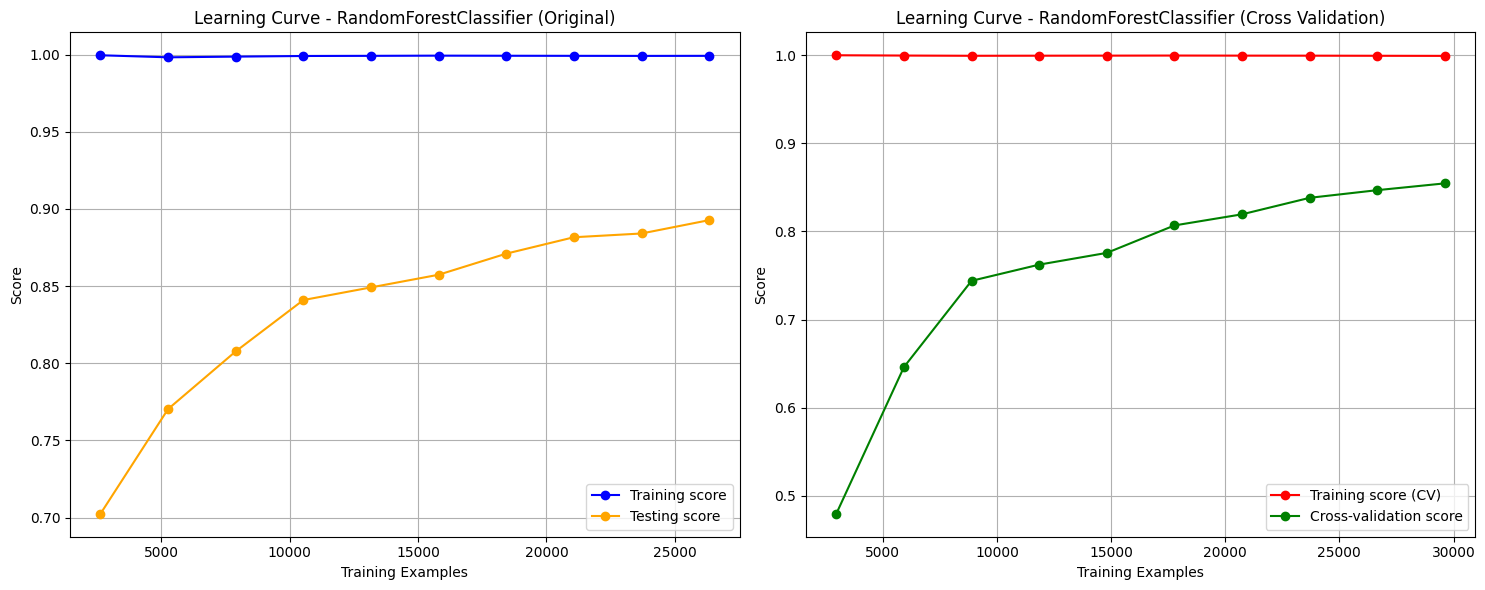

In [101]:
plot_learning_curves_per_model(rf, X, y, X_train, y_train, X_test, y_test, cv=10)

#### **Decision Tree Multilabel Classifier**

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


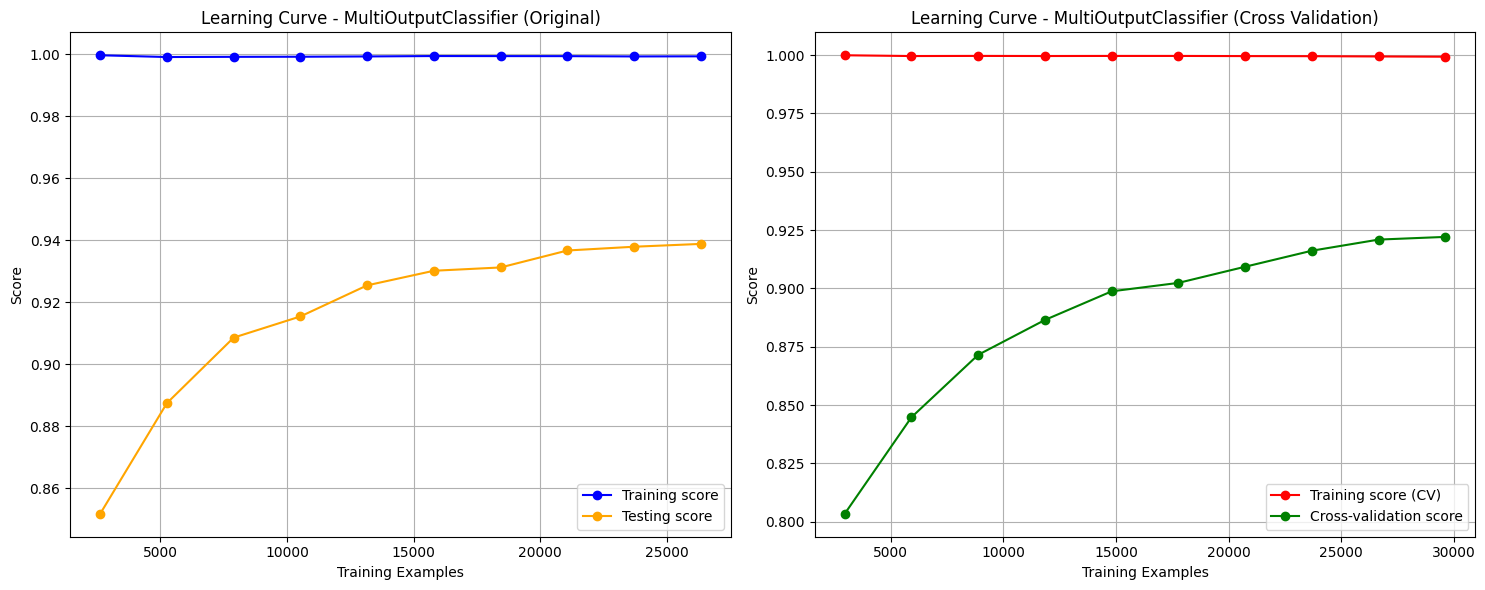

In [102]:
plot_learning_curves_per_model(mldt_clf, X, y, X_train, y_train, X_test, y_test, cv=10)

#### **K-Nearest Neighbors Multilabel**

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a 

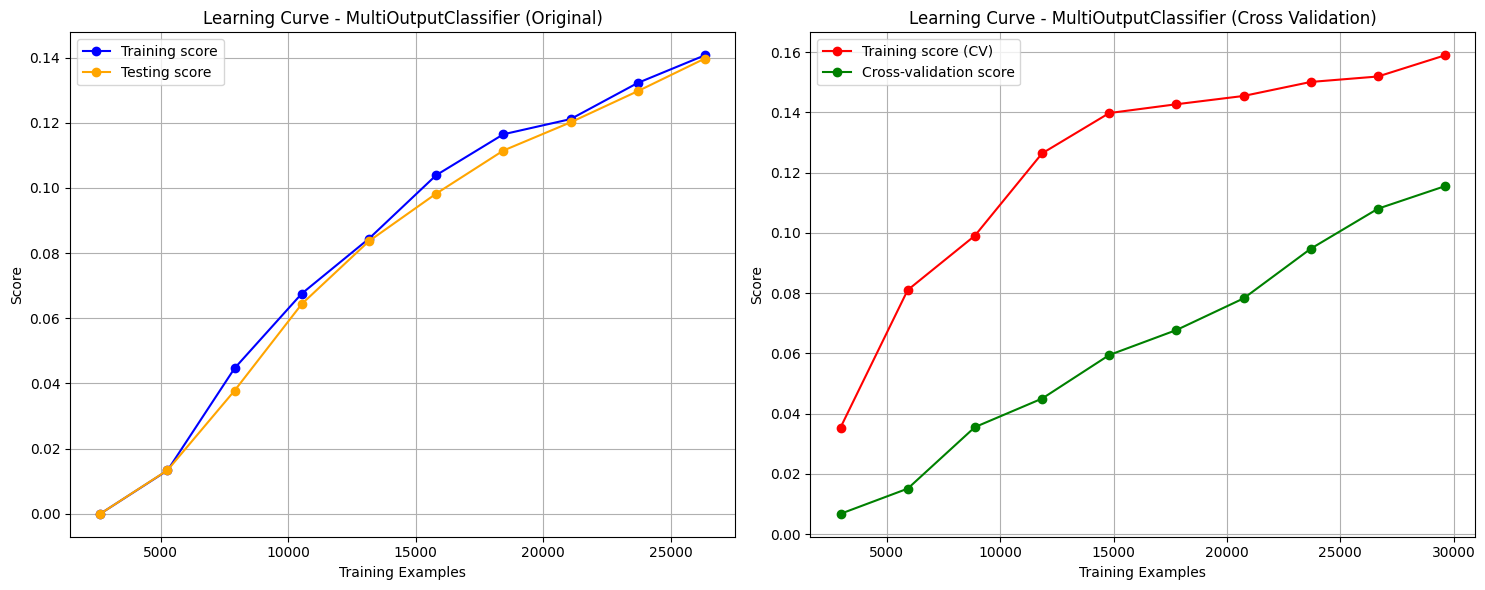

In [103]:
plot_learning_curves_per_model(multioutput_knn, X, y, X_train, y_train, X_test, y_test, cv=10)

#### **Support Vector Machine Multilabel Classifier**

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


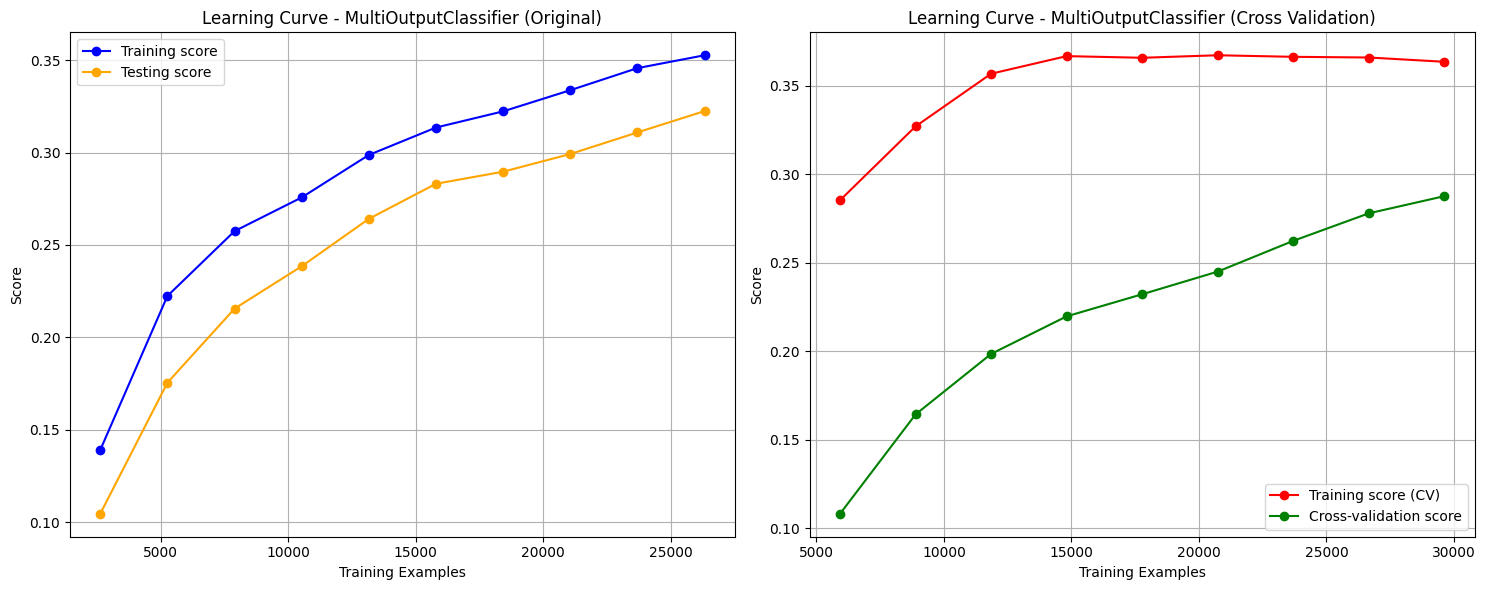

In [104]:
plot_learning_curves_per_model(multioutput_svc, X, y, X_train, y_train, X_test, y_test, cv=10)

#### **Logistic Regression Multilabel Classifier**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

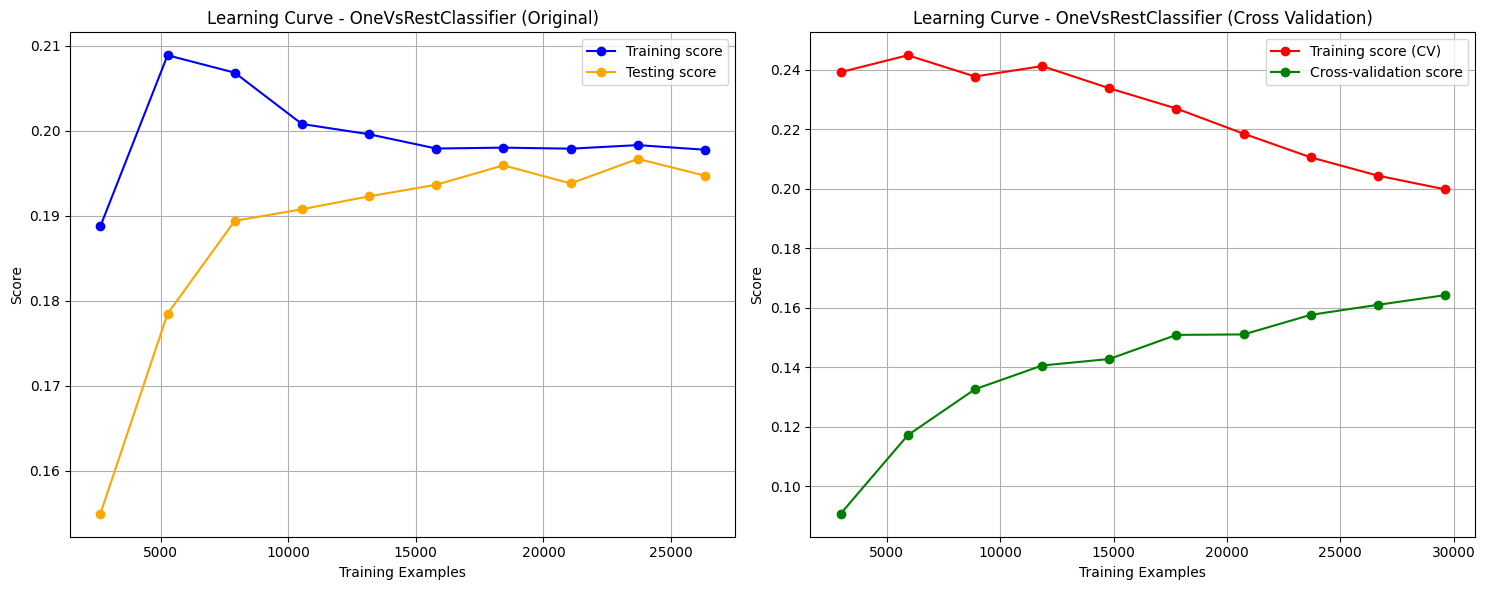

In [105]:
plot_learning_curves_per_model(lr, X, y, X_train, y_train, X_test, y_test, cv=10)

#### **Gaussian Naive Bayes Multilabel Classifier**

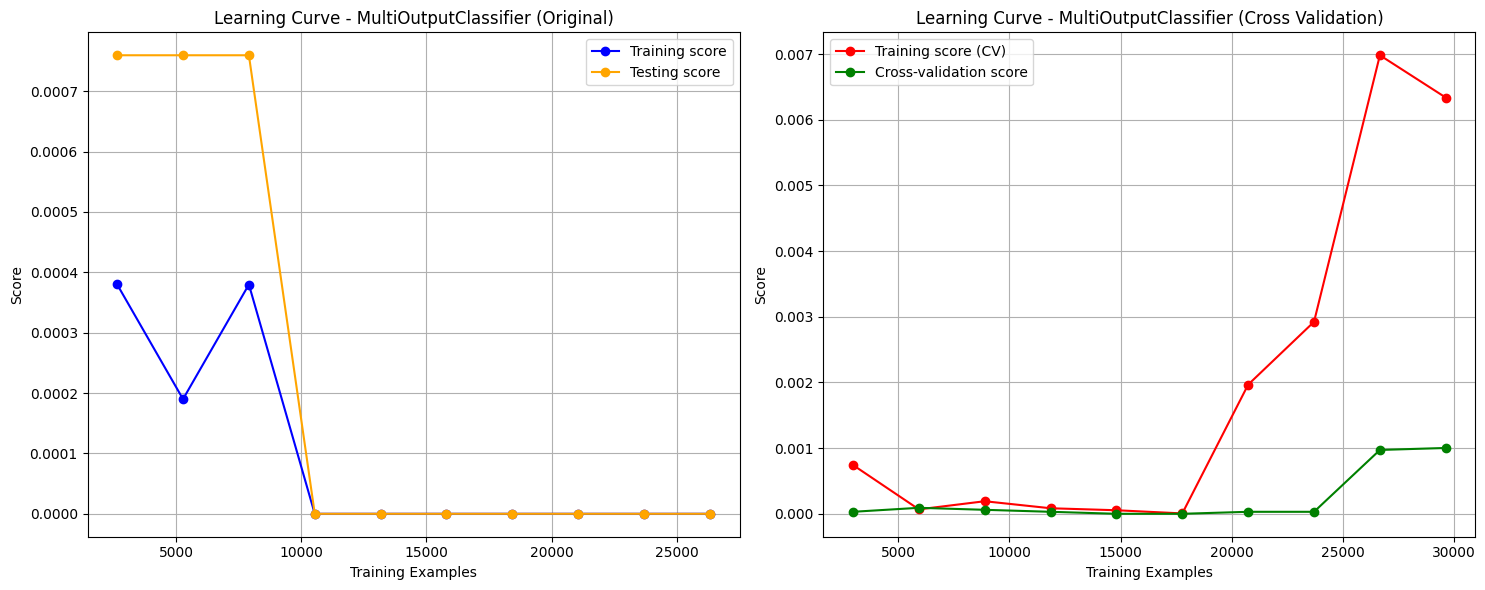

In [106]:
plot_learning_curves_per_model(multi_target_nb, X, y, X_train, y_train, X_test, y_test, cv=10)

#### **Extreme Gradient Boosting Multilabel Classifier**

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


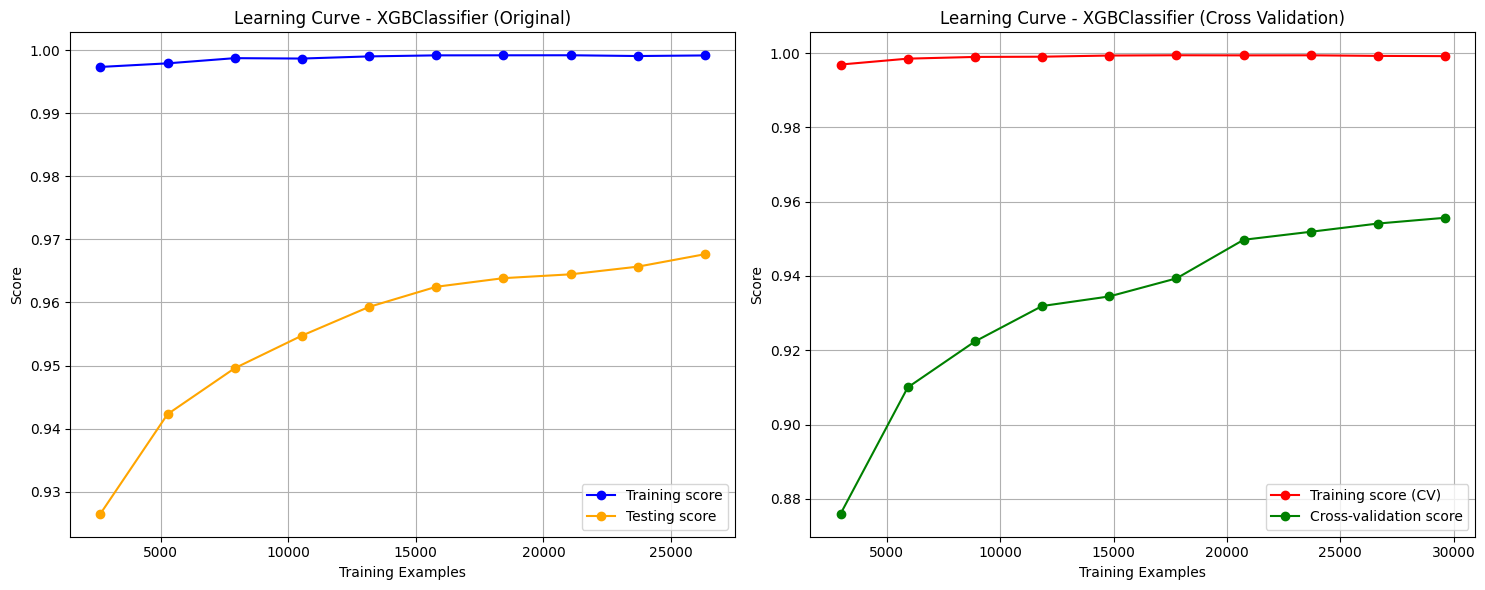

In [107]:
plot_learning_curves_per_model(xgb, X, y, X_train, y_train, X_test, y_test, cv=10)

#### **Adaptive Boosting Multilabel Classifier**

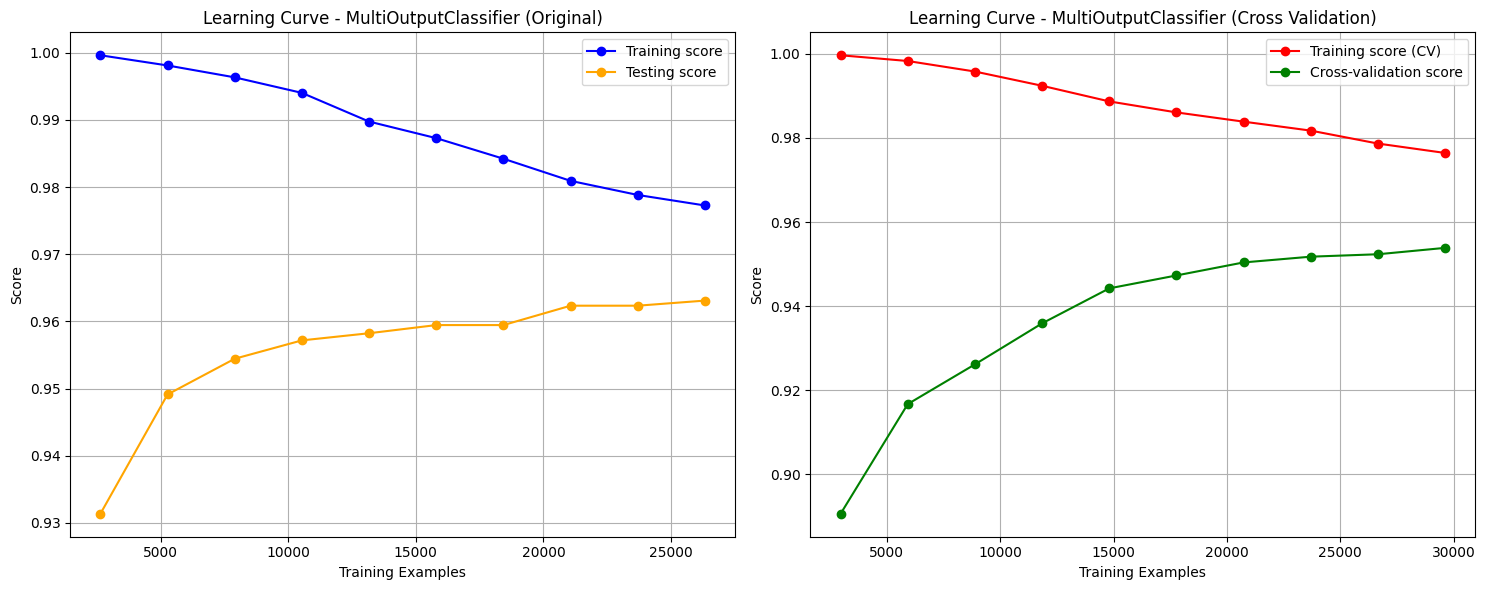

In [108]:
plot_learning_curves_per_model(multilabel_adaboost_clf, X, y, X_train, y_train, X_test, y_test, cv=10)

#### **Neural Network Multilabel Classifier**

In [109]:
# Tentukan jumlah epoch dari history model
num_epochs = 50

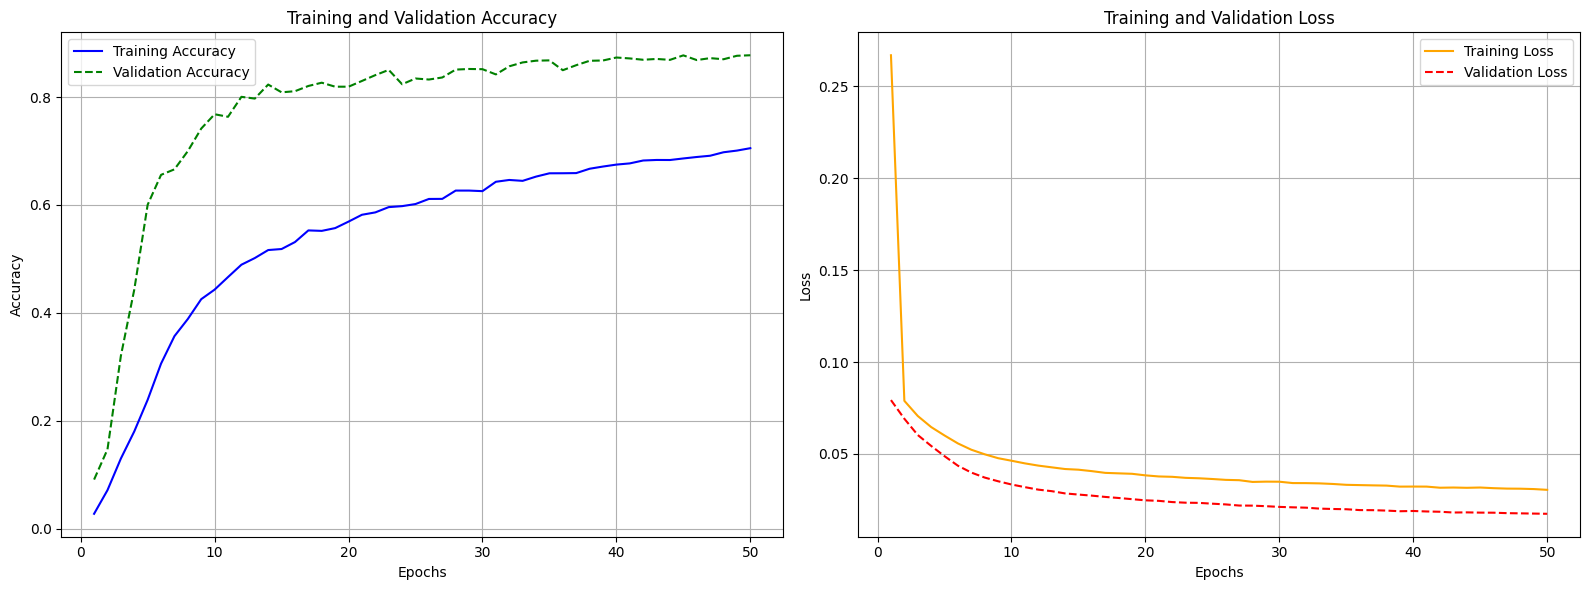

In [110]:
plot_learning_curveNn(history, num_epochs)

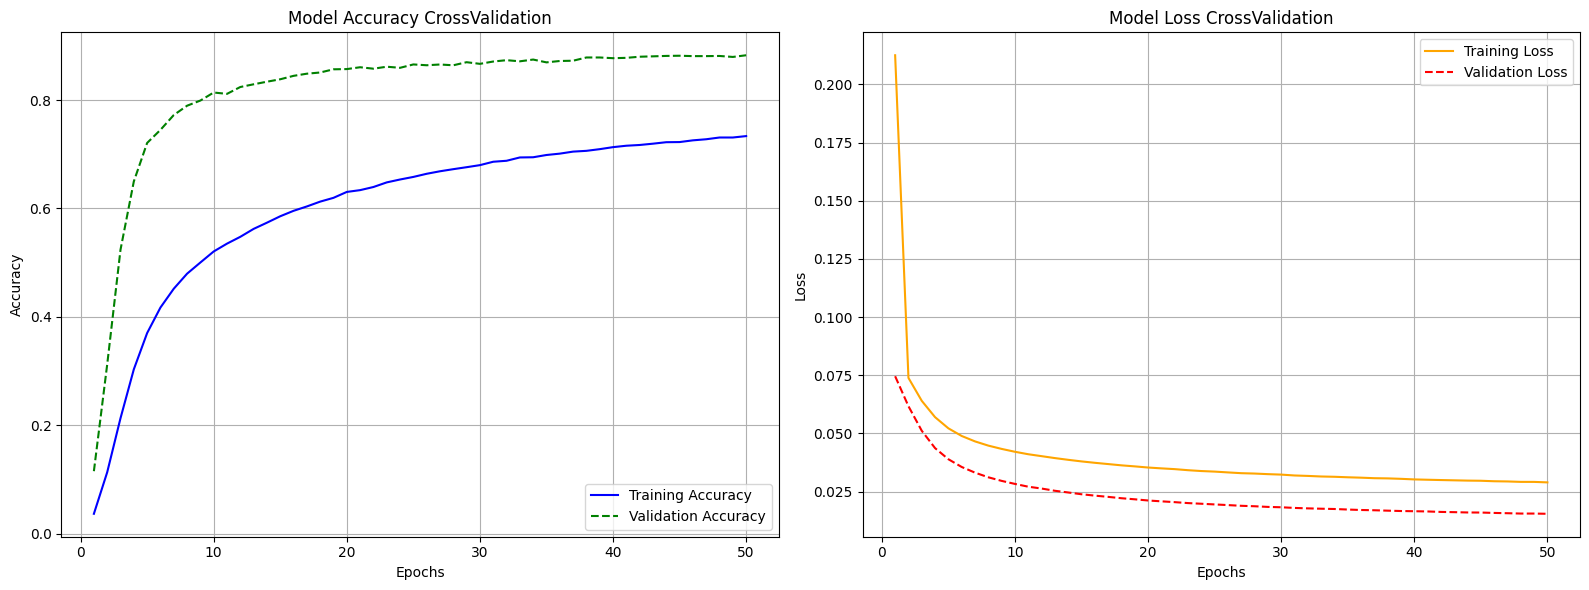

In [111]:
# Plot learning curve
plot_learning_curveCVNn(histories, num_epochs)

## **Model Comparison**

### **Split Data**

In [112]:
df_test = pd.concat([dfRf_Ts,dfDt_Ts,dfKnn_Ts,dfSvc_Ts,dfLr_Ts,dfNb_Ts,dfXGB_Ts,dfADB_Ts,dfNn_Ts], ignore_index=True)
df_test.sort_values(by='Accuracy (Test)', ascending=False)

,Model,Accuracy (Test),Precision (Test),Recall (Test),F1 Score (Test)
6,XGBoost,0.96765,0.99618,0.97345,0.98454
7,AdaBoost,0.96309,0.99358,0.97155,0.98222
1,Decision Tree,0.93879,0.96467,0.97260,0.96849
0,Random Forest,0.89277,0.99778,0.86968,0.92695
8,Neural Network,0.77567,0.97430,0.73037,0.80834
3,Support Vector Classifier,0.32245,0.64841,0.33295,0.38816
4,Logistic Regression,0.19471,0.41390,0.23035,0.26332
2,K-Nearest Neighbors,0.13973,0.53534,0.14313,0.19583
5,Naive Bayes,0.00000,0.17791,0.96449,0.22382


### **Cross Validation**

In [113]:
df_val = pd.concat([dfRf_Valcv,dfDt_Valcv,dfKnn_Valcv,dfSvc_Valcv,dfLr_Valcv,dfGnb_Valcv,dfXGB_Valcv,dfADB_Valcv,dfNn_Valcv], ignore_index=True)
df_val.sort_values(by='Accuracy (Val)', ascending=False)

,Model,Accuracy (Val),Precision (Val),Recall (Val),F1 Score (Val)
6,XGBoost,0.96677,0.99619,0.97319,0.98433
7,AdaBoost,0.96230,0.99488,0.97064,0.98225
1,Decision Tree,0.94110,0.96649,0.97373,0.96980
0,Random Forest,0.89802,0.99764,0.87700,0.93120
8,NeuralNet,0.81381,0.97445,0.76747,0.85857
3,Support Vector Classifier,0.33781,0.65791,0.34408,0.40040
4,Logistic Regression,0.19500,0.40115,0.22595,0.26001
2,K-Nearest Neighbors,0.15116,0.50766,0.15271,0.20978
5,Naive Bayes,0.00501,0.16904,0.96323,0.22047
